In [2]:
from bokeh.io import output_notebook, show, reset_output
import numpy as np
output_notebook()

Loading BokehJS ...

### Plotting connected plots on bokeh

In [15]:
from bokeh.models import ColumnDataSource, TapTool, DataRange1d, Plot, LinearAxis, Grid, HoverTool, CustomJS
from bokeh.plotting import figure, output_file, show
from bokeh.models.glyphs import HBar
from bokeh.layouts import row, column
import bokeh.palettes

p = figure(plot_width=400, plot_height=400,
           tools="tap", title="Click the Dots")
C = np.array(bokeh.palettes.BrBG10)
C2 = C[np.random.randint(low = 0, high=10, size= 100)]

source = ColumnDataSource(data=dict(
    x=np.random.rand(100),
    y=np.random.rand(100),
    color= C2
    ))

p.circle('x', 'y', color='color', size=20, source=source)

source2 = ColumnDataSource(data=dict(
    x=[1,2],
    y=[1,2]))


callback = CustomJS(args=dict(source2=source2), code="""
    var data = source2.data;
    var geom = cb_data['geometries'];
    console.log(geom);
    console.log(data);
    
    //data['x'] = [geom.sx+1,geom.sx-1]
    data['y'] = [geom.sx,geom.sy]    
    
    console.log(data);
    source2.change.emit(); 
""")

    
taptool = p.select(type=TapTool)
taptool.callback = callback; 

xdr = DataRange1d()
ydr = DataRange1d()




p2 = figure(plot_width=400, plot_height=400)

p2.vbar(x='x', width=0.5, bottom=0,
       top='y', source=source2, color="firebrick")



#glyph = HBar(source2.data['x'], source2.data['y'], left=0, height=0.5, fill_color="#b3de69")

#p2.add_glyph(source2, glyph)



#p2.add_glyph(source, glyph)




show(row(p,p2))

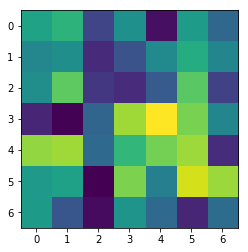

In [63]:
# zooming in on clusters using sliders 
from bokeh.layouts import row, column
from bokeh.models import CustomJS, ColumnDataSource, Slider
import matplotlib.pyplot as plt

slider = Slider(start=0, end=6, value=1, step=1, title="Cluster number")
temp = np.random.rand(7,10)
temp = temp.tolist()

CorrMat = np.random.rand(7,7)

source = ColumnDataSource(data=dict(
    x = temp,
    In= range(7)))

source2 = ColumnDataSource(data=dict(
    x=[0]*10,
    y=range(10)))

source3 = ColumnDataSource(data=dict(
    x=[0]*7,
    y=range(7)))

update_curve = CustomJS(args=dict(source=source, source2 = source2, slider=slider), code="""
    var data = source.get('data');
    var data2 = source2.get('data');
    
    var f = slider.value;
    console.log(data);
    console.log(data2);
    
    data2['x'] = data['x'][f];
    
    source2.change.emit();
""")


plot = figure(plot_width=400, plot_height=400, title = 'Correlation with bulk')
plot.vbar(x='y', width=0.1, bottom=0,
       top='x', source=source2, color="firebrick")

slider.js_on_change('value', update_curve)
show(column(slider, plot))

plt.imshow(CorrMat)
plt.show()

In [ ]:
#plotting heatmap of correlation matrix 
